# Project: Investigate TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


TMDB Movie Dataset is a collection of information on movies ranging from 1960 to 2015 with more than 10,000 movies' records. Each row in the dataset represents a movie and the columns represent various details and attributes about movie. The columns include budget and revenue for the movie, cast, director and production companies as well as the details about genres, runtime, rating and release year. There is additional information that I have not used for this analysis like the tagline or the keywods. Dataset also includes adjusted budget and revenue as per the 2010 USD. For all the analysis, I have used the adjusted data as it gives a standard measure to compare different movies.

In [1]:
# Importing differnt library files and setting the background colour for graphs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')

# Various analysis points

#### 1. Movie release trends over the years
#### 2. TOP-25 Most Profitable Movies
#### 3. TOP-25 most Expensive Movies
#### 4. TOP-25 HIGH Grossing Movies
#### 5. TOP-25 Longest Movies
#### 6. Average Runtime
#### 7. Losses incurred over the years
#### 8. Average profit over the years
#### 9. Average Profit, Revenue and movie release trends for each month
#### 10. Examining Co-relations amongst data.
#### 11. Analysing Columns with multiple values.

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Loaading data and printing out a few lines to have an insight of data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the 1st look of Data, data types look fine except for the 'release date'. And we won't need the imdb_id, homepage and few more columns for our analysis. Most of the null values are contained in the columns I do not intend to use. Let's have a look on this after dropping appropriate columns.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Budget and Revenue columns have a lot of missing values and instead of a 'NA', the cell has a value of 'zero'. I am not dropping these rows as quite a lot of data shall be lost. I will filter these values out wherever necessary. There are a few movies with an exceptionally long runtime. The minimum value for runtime is zero. We will replace it with 'NA'. Rating/vote_average column seems fine. Column popularity looks like having flase values but popularity of a movie is a factor which can vary a lot and seems fine for now.

Let's search for duplicated data.

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.duplicated().sum()

0

Just one row of duplicated data. We can just drop it. I am creating a new dataframe filtering the values that will be usefull for the analysis.

In [8]:
df1 = df.drop(['imdb_id','budget','revenue','homepage','tagline','keywords','overview'],axis=1)

Here, we have created a new dataframe out of the original with the columns we intend to utilize in our analysis. Budget and revenue are dropped as we will be using the adjusted data.

In [9]:
df1.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Colums cast, genres and production_companies have multiple values seperated by a '|'. I am converting each value to a list to use it later.

In [10]:
df1['genres'] = df1['genres'].str.strip().str.split('|')
df1['cast'] = df1['cast'].str.strip().str.split('|')
df1['production_companies'] = df1['production_companies'].str.strip().str.split('|')

In [11]:
df1['revenue_adj'] = df1['revenue_adj']/1000000
df1['budget_adj'] = df1['budget_adj']/1000000
df1['profit'] = df1['revenue_adj']-df1['budget_adj']

The values in 'revenue_adj' and 'budget_adj' columns were in unit Dollars which is now converted to unit Million Dollars for the sake of better readability. And a new column 'profit' is added to the dataframe which accounts for each movie's overall profit.
Next, I will convert the colummn 'release_date' data type from object/string to datetime.

In [12]:
df1['release_date'] = pd.to_datetime(df1['release_date'], format='%m/%d/%y')
df1['release_month'] = df1['release_date'].dt.month

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
profit                  10865 non-null float64
release_month           10865 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(5)
memory usage: 1.4+ MB


In [14]:
df1.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
0,135397,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,137.999939,1392.445893,1254.445953,6
1,76341,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,137.999939,348.161292,210.161353,5
2,262500,13.112507,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,101.199955,271.619025,170.419070,3
3,140607,11.173104,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,183.999919,1902.723130,1718.723211,12
4,168259,9.335014,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,174.799923,1385.748801,1210.948878,4


In [15]:
df1.tail()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
10861,21,0.080598,The Endless Summer,"[Michael Hynson, Robert August, Lord 'Tally Ho...",Bruce Brown,95,[Documentary],[Bruce Brown Films],2066-06-15,11,7.4,1966,0.000000,0.0,0.000000,6
10862,20379,0.065543,Grand Prix,"[James Garner, Eva Marie Saint, Yves Montand, ...",John Frankenheimer,176,"[Action, Adventure, Drama]","[Cherokee Productions, Joel Productions, Dougl...",2066-12-21,20,5.7,1966,0.000000,0.0,0.000000,12
10863,39768,0.065141,Beregis Avtomobilya,"[Innokentiy Smoktunovskiy, Oleg Efremov, Georg...",Eldar Ryazanov,94,"[Mystery, Comedy]",[Mosfilm],2066-01-01,11,6.5,1966,0.000000,0.0,0.000000,1
10864,21449,0.064317,"What's Up, Tiger Lily?","[Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...",Woody Allen,80,"[Action, Comedy]",[Benedict Pictures Corp.],2066-11-02,22,5.4,1966,0.000000,0.0,0.000000,11
10865,22293,0.035919,Manos: The Hands of Fate,"[Harold P. Warren, Tom Neyman, John Reynolds, ...",Harold P. Warren,74,[Horror],[Norm-Iris],2066-11-15,15,1.5,1966,0.127642,0.0,-0.127642,11


In the above sample data, we can see the 'zero' values in budget and revenue columns. we will filter it out later otherwise a lot of data which can be used for other analysis shall be lost. For example in rating, popularity and runtime.

In [16]:
df1.isna().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
profit                     0
release_month              0
dtype: int64

The 'NA' values are present in the non numeric data or the string data. I would have dropped these. But it constitutes to around 10% of the data. I will drop them explicitly while working on the analysis of those particular columns.

In [17]:
df1['runtime'].mean()

102.07179015186378

In [18]:
df1['runtime'] = df1['runtime'].replace(0,np.NAN)

In [19]:
df1['runtime'].mean()

102.3638545320288

Replaced the zero values in runtime and the average runtime increased by around 17 seconds. Data cleaning is completed and we have pur final data to work with.

<a id='eda'></a>
## Exploratory Data Analysis


# Question 1: Increase in the amount of movies per year

Here, the variable 'movie_count' is used to store the number of movies released per year and plot the results

In [20]:
movie_count = df1['release_year'].value_counts()
movie_count.sort_index(inplace=True);

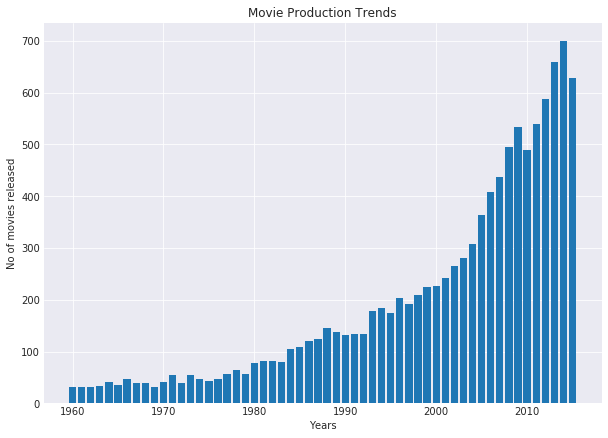

In [21]:
plt.figure(figsize=(10,7))
plt.bar(movie_count.index,movie_count)
plt.title('Movie Production Trends')
plt.xlabel('Years')
plt.ylabel('No of movies released');

In [22]:
movie_count.idxmax(),movie_count[movie_count.idxmax()]

(2014, 700)

The year with maximum number of movie release was 2014 with 700 movies.

In [23]:
movie_count.idxmin(), movie_count[movie_count.idxmin()]

(1961, 31)

The year with minimum number of movie release was 1961 with 31 movies.

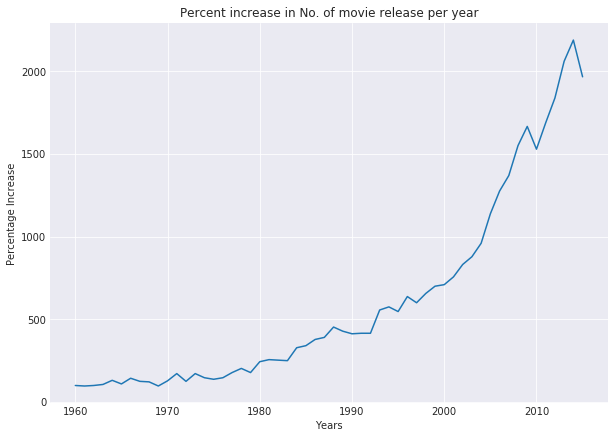

In [24]:
plt.figure(figsize=(10,7))
plt.plot(movie_count.index,movie_count/movie_count[1960]*100)
plt.title('Percent increase in No. of movie release per year')
plt.xlabel('Years')
plt.ylabel('Percentage Increase');

From the above two graphs, we can see that the Movie industry has seen a continuous growth over the years. Number of movies released per year has increased by more than 20 times(i.e.2000%) from 1960 to 2015 especially after 1990. From 1993 to 2015, the number of movies has increased by around 4 times or 400%.

# Question 2: Top 25 most profitable movies

From here on, I have used 'df_new' as a temporary dataframe for each analysis by filtering out the required columns, sorting the data and dropping the null values as required. Hence, the dataframe 'df1' is remained untouched and identical all stages of analysis.

Here I have sorted the data on the basis of profit in descending order and selected the TOP 25 rows for plot. By default, the values on the x-axis are sorted while plotting. In this case, the sorting was being done the name of the movies alphabetically. To avoid that, movie names were set as Index. To avoid over-lapping of movie titles on x-axis, they are rotated vertically and further margins and bottom adjustment was done to avoid over-lapping of movie title with the axis of graph.(Took help of Official matplotlib documentation page and examples) 

The average runtime calculated here will be used later.

In [25]:
df_new = df1.sort_values(by=['profit'], ascending=False)
df_new.set_index('original_title',inplace=True)
df_new = df_new[:26]
avg_run_profit=df_new['runtime'].mean()

In [26]:
# Uncomment the below lines to find the other details about the TOP-25 MOST Profitable movies from 1960-2015.
# *make sure to you run the above cell first. :)

#df_new

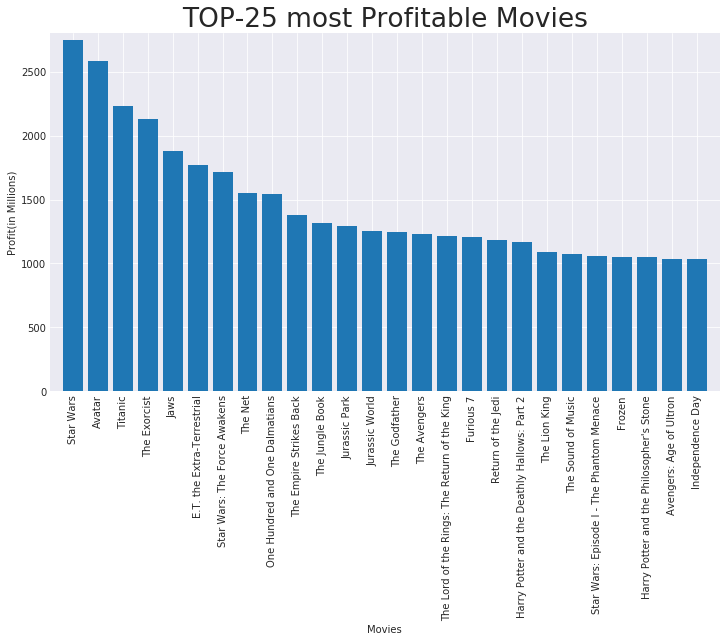

In [27]:
plt.figure(figsize=(12,6))
ind = range(len(df_new.index))
plt.bar(ind, df_new['profit'])
plt.xticks(ind, df_new.index, rotation= 'vertical')
plt.margins(0.02)
plt.subplots_adjust(bottom=0.05)
plt.rcParams.update({'font.size':22})
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16)
plt.title('TOP-25 most Profitable Movies')
plt.xlabel('Movies')
plt.ylabel('Profit(in Millions)');

# Question 3: Top 25 most Expensive movies

In [28]:
df_new = df1.sort_values(by=['budget_adj'], ascending=False)
df_new.set_index('original_title',inplace=True)
df_new = df_new[:26]
avg_run_expensive = df_new['runtime'].mean()

In [29]:
# Uncomment the below lines to find the other details about the TOP-25 MOST Profitable movies from 1960-2015.
# *make sure to you run the above cell first. :)

#df_new

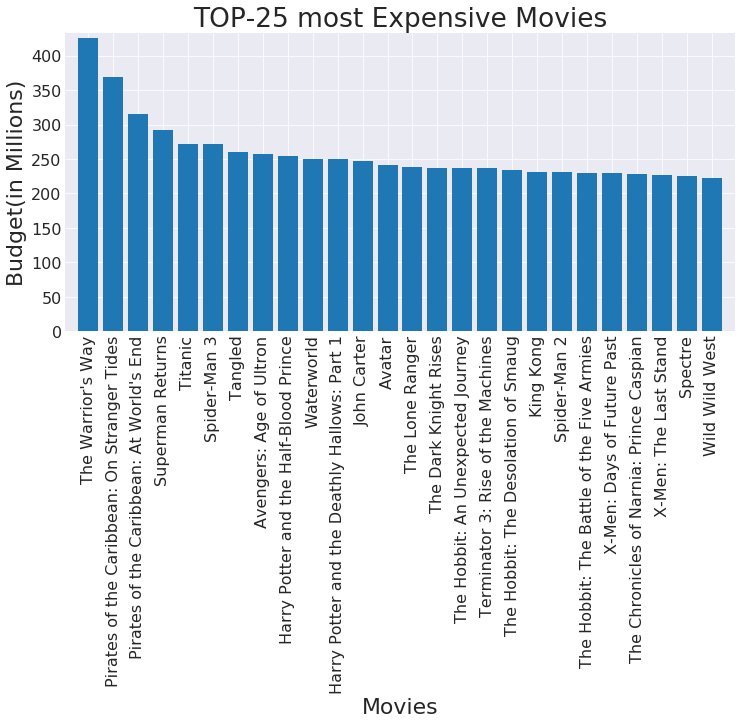

In [31]:
plt.figure(figsize=(12,5))
ind = range(len(df_new.index))
plt.bar(ind, df_new['budget_adj'])
plt.xticks(ind, df_new.index, rotation= 'vertical')
plt.margins(0.02)
plt.subplots_adjust(bottom=0.05)
plt.rcParams.update({'font.size':22})
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16)
plt.title('TOP-25 most Expensive Movies')
plt.xlabel('Movies')
plt.ylabel('Budget(in Millions)');

# Question 4: Top 25 high Grossing movies

In [32]:
df_new = df1.sort_values(by=['revenue_adj'], ascending=False)
df_new.set_index('original_title',inplace=True)
df_new = df_new[:26]
avg_run_highgross = df_new['runtime'].mean()

In [33]:
# Uncomment the below lines to find the other details about the TOP-25 MOST Profitable movies from 1960-2015.
# *make sure to you run the above cell first. :)

#df_new

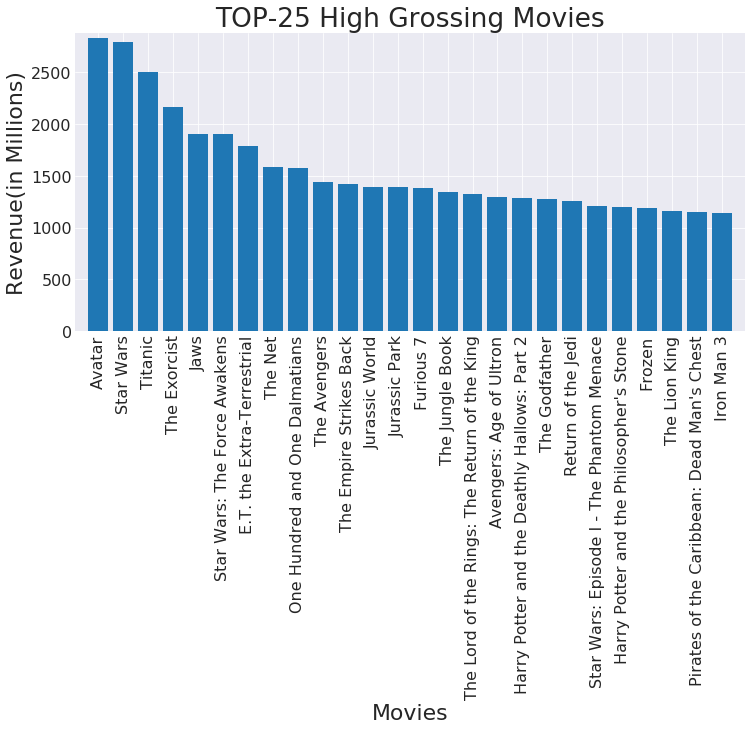

In [35]:
plt.figure(figsize=(12,5))
ind = range(len(df_new.index))
plt.bar(ind, df_new['revenue_adj'])
plt.xticks(ind, df_new.index, rotation= 'vertical')
plt.margins(0.02)
plt.subplots_adjust(bottom=0.05)
plt.rcParams.update({'font.size':22})
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16)
plt.title('TOP-25 High Grossing Movies')
plt.xlabel('Movies')
plt.ylabel('Revenue(in Millions)');

# Question 5: TOP-25 Longest Movies

In [36]:
df_new = df1.sort_values(by=['runtime'], ascending=False)
df_new.set_index('original_title',inplace=True)
df_new = df_new[:26]
avg_run_longest = df_new['runtime'].mean()

In [37]:
# Uncomment the below lines to find the other details about the TOP-25 MOST Profitable movies from 1960-2015.
# *make sure to you run the above cell first. :)

#df_new

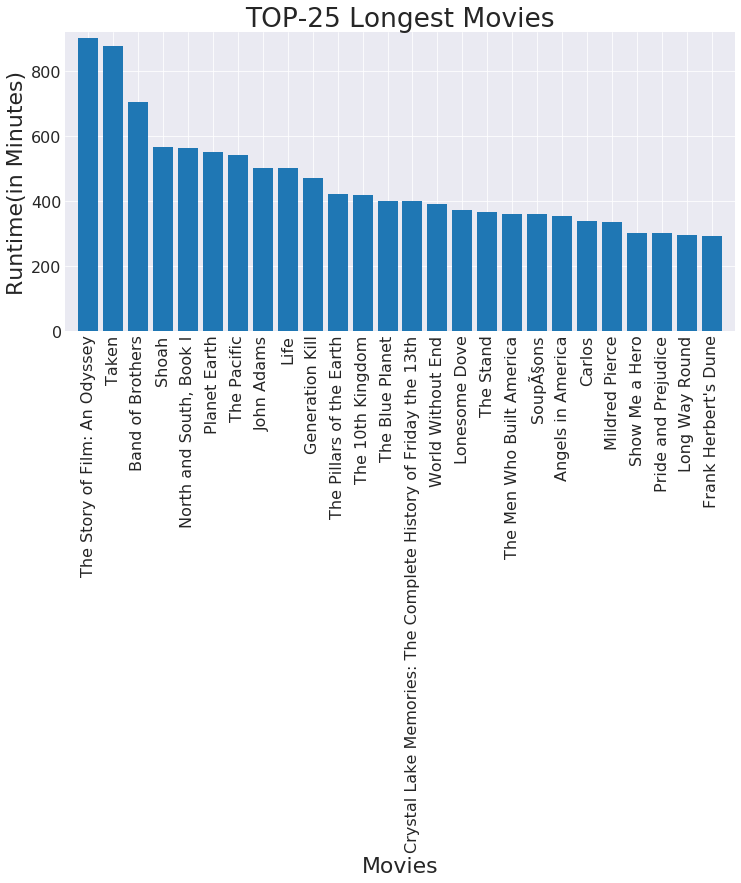

In [38]:
plt.figure(figsize=(12,5))
ind = range(len(df_new.index))
plt.bar(ind, df_new['runtime'])
plt.xticks(ind, df_new.index, rotation= 'vertical')
plt.margins(0.02)
plt.subplots_adjust(bottom=0.05)
plt.rcParams.update({'font.size':22})
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.title('TOP-25 Longest Movies')
plt.xlabel('Movies')
plt.ylabel('Runtime(in Minutes)');

Note: I created a template for analysis in Question 2 to be used untill Question 5.

# Question 6: Average Runtime

Average runtime of all the movies in the entire dataset:

In [39]:
df1['runtime'].mean()

102.3638545320288

Average runtime of most profitable movies:

In [40]:
avg_run_profit

133.84615384615384

Average runtime of most expensive movies:

In [43]:
avg_run_expensive

142.73076923076923

Average runtime of movies with high revenues:

In [44]:
avg_run_highgross

132.38461538461539

Average runtime of the longest movies:

In [45]:
avg_run_longest

456.42307692307691

Movies with the runtime in the range of 130 - 135 minutes seems to be good for business.

# Question 7: Losses incurred per year

In [46]:
df1[df1['profit']<0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
48,265208,2.932340,Wild Card,"[Jason Statham, Michael Angarano, Milo Ventimi...",Simon West,92.0,"[Thriller, Crime, Drama]","[Current Entertainment, Lionsgate, Sierra / Af...",2015-01-14,481,5.3,2015,27.599988,0.000000,-27.599988,1
57,210860,2.575711,Mortdecai,"[Johnny Depp, Gwyneth Paltrow, Ewan McGregor, ...",David Koepp,106.0,"[Comedy, Adventure]","[Lionsgate, Mad Chance, OddLot Entertainment, ...",2015-01-21,696,5.3,2015,55.199976,27.985063,-27.214913,1
59,201088,2.550747,Blackhat,"[Chris Hemsworth, Leehom Wang, Tang Wei, Viola...",Michael Mann,133.0,"[Mystery, Crime, Action, Thriller, Drama]","[Universal Pictures, Forward Pass, Legendary P...",2015-01-13,584,5.0,2015,64.399972,16.332698,-48.067274,1
66,205775,2.345821,In the Heart of the Sea,"[Chris Hemsworth, Benjamin Walker, Cillian Mur...",Ron Howard,122.0,"[Thriller, Drama, Adventure, Action, History]","[Imagine Entertainment, Spring Creek Productio...",2015-11-20,805,6.4,2015,91.999960,86.315059,-5.684900,11
67,334074,2.331636,Survivor,"[Pierce Brosnan, Milla Jovovich, Dylan McDermo...",James McTeigue,96.0,"[Crime, Thriller, Action]","[Nu Image Films, Winkler Films, Millennium Fil...",2015-05-21,280,5.4,2015,18.399992,0.000000,-18.399992,5
73,266647,2.234573,Pan,"[Levi Miller, Garrett Hedlund, Hugh Jackman, R...",Joe Wright,111.0,"[Adventure, Family, Fantasy]","[Warner Bros., Moving Picture Company (MPC), B...",2015-09-24,586,5.9,2015,137.999939,118.117202,-19.882737,9
84,290764,2.026651,Tracers,"[Marie Avgeropoulos, Taylor Lautner, Adam Rayn...",Daniel Benmayor,94.0,"[Action, Crime, Drama]","[Temple Hill Entertainment, Senator Film, Free...",2015-01-15,326,5.9,2015,10.119996,1.714249,-8.405747,1
87,287424,1.980039,Maggie,"[Arnold Schwarzenegger, Abigail Breslin, Joely...",Henry Hobson,95.0,[Horror],"[Lionsgate, Grindstone Entertainment Group, Si...",2015-05-08,384,5.1,2015,3.679998,0.172143,-3.507855,5
89,181283,1.956320,Child 44,"[Tom Hardy, Gary Oldman, Noomi Rapace, Joel Ki...",Daniel Espinosa,137.0,"[Crime, Thriller]","[Summit Entertainment, Scott Free Productions,...",2015-03-15,341,5.9,2015,45.999980,3.058382,-42.941598,3
93,307663,1.872696,Vice,"[Ambyr Childers, Thomas Jane, Bryan Greenberg,...",Brian A Miller,96.0,"[Thriller, Science Fiction, Action, Adventure]","[Grindstone Entertainment Group, K5 Internatio...",2015-01-16,181,4.1,2015,9.199996,0.000000,-9.199996,1


In the above data, there are rows with value in revenue column being zero. So we have to further refine the condition. 

In [47]:
df_new = df1[(df1['profit']<0) & (df1['revenue_adj']>0)]
df_new

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
57,210860,2.575711,Mortdecai,"[Johnny Depp, Gwyneth Paltrow, Ewan McGregor, ...",David Koepp,106.0,"[Comedy, Adventure]","[Lionsgate, Mad Chance, OddLot Entertainment, ...",2015-01-21,696,5.3,2015,55.199976,27.985063,-27.214913,1
59,201088,2.550747,Blackhat,"[Chris Hemsworth, Leehom Wang, Tang Wei, Viola...",Michael Mann,133.0,"[Mystery, Crime, Action, Thriller, Drama]","[Universal Pictures, Forward Pass, Legendary P...",2015-01-13,584,5.0,2015,64.399972,16.332698,-48.067274,1
66,205775,2.345821,In the Heart of the Sea,"[Chris Hemsworth, Benjamin Walker, Cillian Mur...",Ron Howard,122.0,"[Thriller, Drama, Adventure, Action, History]","[Imagine Entertainment, Spring Creek Productio...",2015-11-20,805,6.4,2015,91.999960,86.315059,-5.684900,11
73,266647,2.234573,Pan,"[Levi Miller, Garrett Hedlund, Hugh Jackman, R...",Joe Wright,111.0,"[Adventure, Family, Fantasy]","[Warner Bros., Moving Picture Company (MPC), B...",2015-09-24,586,5.9,2015,137.999939,118.117202,-19.882737,9
84,290764,2.026651,Tracers,"[Marie Avgeropoulos, Taylor Lautner, Adam Rayn...",Daniel Benmayor,94.0,"[Action, Crime, Drama]","[Temple Hill Entertainment, Senator Film, Free...",2015-01-15,326,5.9,2015,10.119996,1.714249,-8.405747,1
87,287424,1.980039,Maggie,"[Arnold Schwarzenegger, Abigail Breslin, Joely...",Henry Hobson,95.0,[Horror],"[Lionsgate, Grindstone Entertainment Group, Si...",2015-05-08,384,5.1,2015,3.679998,0.172143,-3.507855,5
89,181283,1.956320,Child 44,"[Tom Hardy, Gary Oldman, Noomi Rapace, Joel Ki...",Daniel Espinosa,137.0,"[Crime, Thriller]","[Summit Entertainment, Scott Free Productions,...",2015-03-15,341,5.9,2015,45.999980,3.058382,-42.941598,3
106,273477,1.499614,Scouts Guide to the Zombie Apocalypse,"[Tye Sheridan, Logan Miller, Joey Morgan, Sara...",Christopher B. Landon,93.0,"[Comedy, Horror]","[Paramount Pictures, Oops Doughnuts Production...",2015-10-23,288,6.2,2015,13.799994,13.671899,-0.128095,10
109,336004,1.449072,Heist,"[Jeffrey Dean Morgan, Robert De Niro, Kate Bos...",Scott Mann,93.0,"[Crime, Action, Thriller]","[Emmett/Furla Films, Silver Plane Films, Mass ...",2015-11-13,233,5.4,2015,8.187996,0.046125,-8.141871,11
111,182560,1.443406,Dark Places,"[Charlize Theron, Nicholas Hoult, Christina He...",Gilles Paquet-Brenner,113.0,"[Drama, Mystery, Thriller]","[Denver and Delilah Productions, Mandalay Visi...",2015-03-31,322,5.7,2015,18.399992,0.191901,-18.208091,3


In [48]:
df_new.shape, df_new.shape[0]/(2015-1960)

((1072, 16), 19.490909090909092)

A total of 1072 Box office Disasters. Almost 20 movies a year. But considering 700 movies are released in an year, this is a small number now.  

In [49]:
df_new[df_new['release_year']>2000].shape[0], df1[df1['release_year']>2000].shape[0]

(715, 6940)

A total of 715 movies in loss in last 15 years i.e. almost 48 disasters in a year. 715 movie failures out of 6940 amounts to 10.3%.

In [50]:
df_new['profit'].mean()

-17.159900705764514

An average loss of more than 17 Million Dollars is incurred each year.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


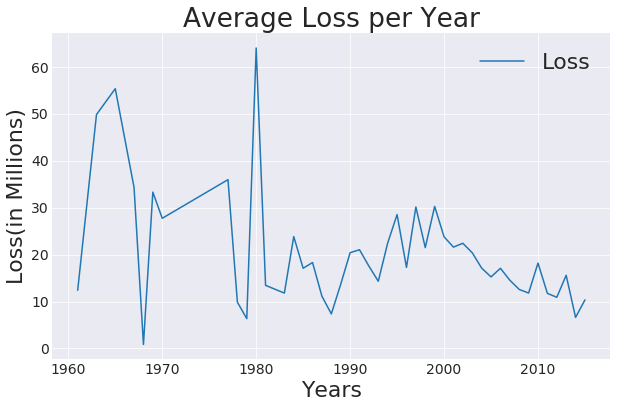

In [51]:
plt.figure(figsize=(10,6))
df_new['profit'] = df_new['profit']*(-1)
df_new.groupby(['release_year'])['profit'].mean().plot(label = 'Loss')
plt.title('Average Loss per Year')
plt.xlabel('Years')
plt.ylabel('Loss(in Millions)')
plt.legend()

In [52]:
df_new.groupby(['release_year'])['profit'].sum().idxmax()

1999

In [53]:
df_new.groupby(['release_year'])['profit'].sum().idxmin()

1968

Overall losses have reduced over the years. And the number of movie releases have increased. This could be affecting the overall loss. As per the above two cells, years with highest and lowest total loss were 1999 and 1968. Loss in 1968 can be seen in the graph. There are 3 peaks near 2000, a few years with high losses but the losses have gone down after that. 

# Question 8: Mean Profit per year

In the below analysis, I have plotted two graphs. In the first, The zero values in budget and revenue were not whereas they were removed in the 2nd. And there is a difference of 2 to 4 times in 2nd from 1st.

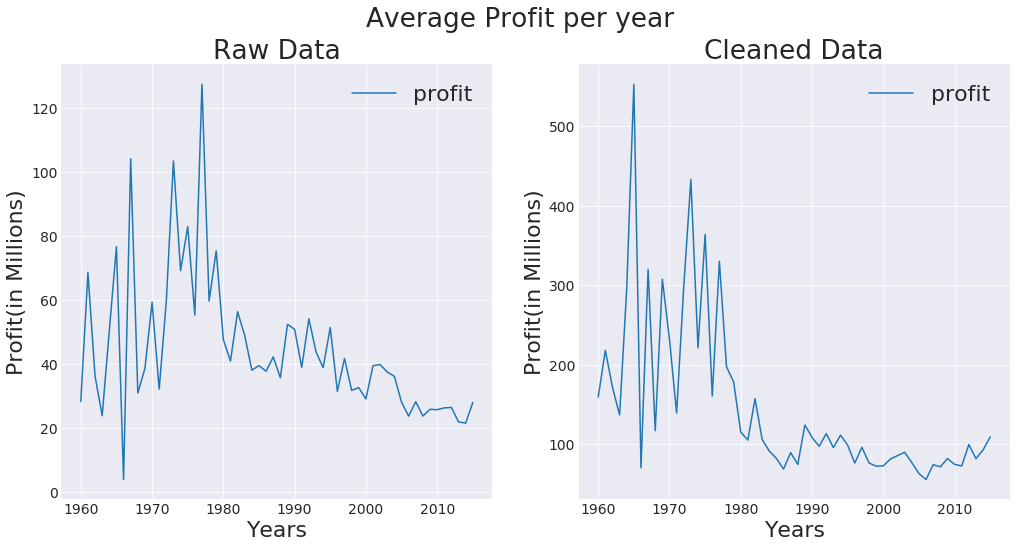

In [54]:
plt.figure(figsize=(17,8))
plt.suptitle('Average Profit per year')
plt.subplot(121)
df_new = df1.groupby(['release_year'])['profit'].mean()
df_new.plot()
plt.title('Raw Data')
plt.xlabel('Years')
plt.ylabel('Profit(in Millions)')
plt.legend()

plt.subplot(122)
df_new = df1[(df1['budget_adj']>0) & (df1['revenue_adj']>0)]
df_new.groupby(['release_year'])['profit'].mean().plot()
plt.title('Cleaned Data')
plt.xlabel('Years')
plt.ylabel('Profit(in Millions)')
plt.legend()

In [55]:
df_new.groupby(['release_year'])['profit'].sum().idxmax(), df_new.groupby(['release_year'])['profit'].sum().idxmin()

(2015, 1966)

In [56]:
df_new.groupby(['release_year'])['profit'].mean().idxmax(), df_new.groupby(['release_year'])['profit'].mean().idxmin()

(1965, 2006)

The overall profit has gone down over the years. But the above graph shows the overall profit per movie per year. and since the number of movies has increased. We see the total profit has increased over time. But the above graph is more important as it shows how individual movies are doing now. As there is more competition with increased movie released.

Total profit was highest in 2015 but the average profit per movie is highest in 1965. These numbers have different meanings and importance. 2015 represents more business/money in market/industry and 1965 represents more profits per movie team. 

# Question 9: Average Profit, Revenue and Movie releases per month

A new column 'release_date' is added here to temporary dataset for the following analysis. Only the rows with non-zero values in budget and revenue columns are used here.

In [57]:
df_new = df1[(df1['budget_adj']>0) & (df1['revenue_adj']>0)]
df_new['release_month'] = df_new['release_date'].dt.month

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
profit_monthly = df_new.groupby(['release_month'])['profit'].mean()
profit_monthly

release_month
1      45.711144
2      47.788961
3      89.789625
4      70.887947
5     145.679177
6     166.679734
7     121.638861
8      53.927954
9      35.874389
10     64.076326
11    128.880444
12    136.347698
Name: profit, dtype: float64

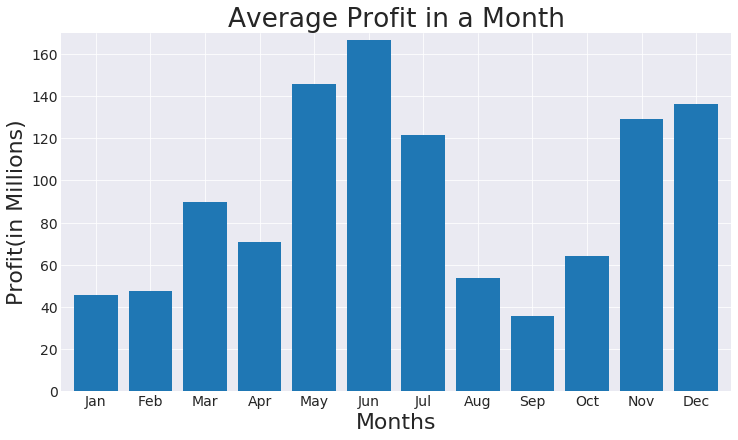

In [59]:
plt.figure(figsize=(12,6))
tick = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ind = range(len(profit_monthly.index))
plt.bar(ind, profit_monthly)
plt.xticks(ind, tick)
plt.margins(0.02)
plt.subplots_adjust(bottom=0.05)
plt.rcParams.update({'font.size':22})
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)
plt.title('Average Profit in a Month')
plt.xlabel('Months')
plt.ylabel('Profit(in Millions)');

Summer is the best time to release a movie. June has the highest profit average. Next to June is May followed by December and November

In [60]:
revenue_monthly = df_new.groupby(['release_month'])['revenue_adj'].mean()
revenue_monthly

release_month
1      71.460598
2      83.328138
3     132.550634
4     111.020284
5     204.727476
6     230.441575
7     174.722522
8      89.180776
9      63.308970
10    101.246156
11    184.670805
12    190.175499
Name: revenue_adj, dtype: float64

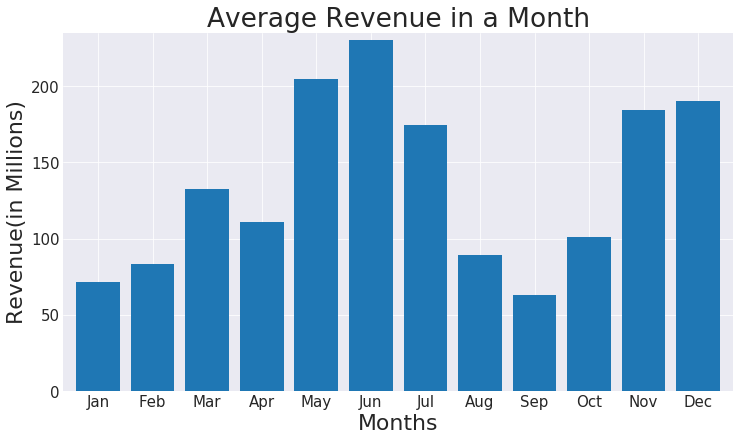

In [61]:
plt.figure(figsize=(12,6))
tick = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ind = range(len(revenue_monthly.index))
plt.bar(ind, revenue_monthly)
plt.xticks(ind, tick)
plt.margins(0.02)
plt.subplots_adjust(bottom=0.05)
plt.rcParams.update({'font.size':22})
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)
plt.title('Average Revenue in a Month')
plt.xlabel('Months')
plt.ylabel('Revenue(in Millions)');

The results are as expected. June is the month for high grossing movies followed by May , December and November.


In [62]:
movies_monthly = df_new.sort_values('release_month')['release_month'].value_counts()

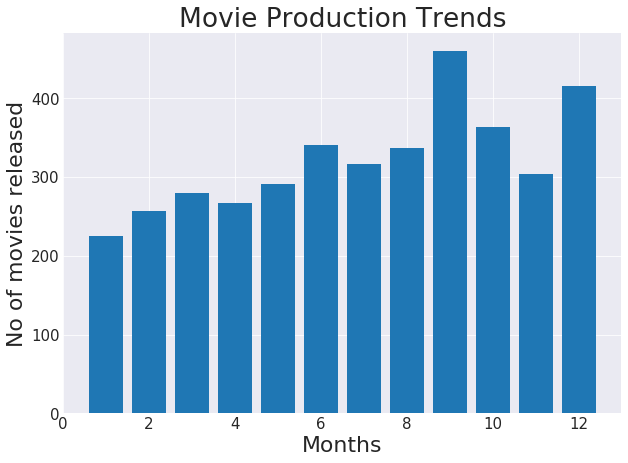

In [63]:
plt.figure(figsize=(10,7))
plt.bar(movies_monthly.index, movies_monthly)
plt.title('Movie Production Trends')
plt.xlabel('Months')
plt.ylabel('No of movies released');

September has most number of movie releases followed by December, October and June. So now overall, December is the favourite month for a movie release.

In [64]:
df1.corr()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
id,1.000000,-0.014351,-0.078780,-0.035555,-0.058391,0.511393,-0.189008,-0.138487,-0.108179,0.041734
popularity,-0.014351,1.000000,0.136901,0.800828,0.209517,0.089806,0.513555,0.609085,0.562838,0.043240
runtime,-0.078780,0.136901,1.000000,0.162602,0.154775,-0.112252,0.219907,0.175063,0.141963,0.070358
vote_count,-0.035555,0.800828,0.162602,1.000000,0.253818,0.107962,0.587062,0.707941,0.656885,0.026282
vote_average,-0.058391,0.209517,0.154775,0.253818,1.000000,-0.117576,0.093079,0.193062,0.197501,0.073111
release_year,0.511393,0.089806,-0.112252,0.107962,-0.117576,1.000000,0.016771,-0.066236,-0.081103,-0.046961
budget_adj,-0.189008,0.513555,0.219907,0.587062,0.093079,0.016771,1.000000,0.646627,0.472926,0.056706
revenue_adj,-0.138487,0.609085,0.175063,0.707941,0.193062,-0.066236,0.646627,1.000000,0.977917,0.050649
profit,-0.108179,0.562838,0.141963,0.656885,0.197501,-0.081103,0.472926,0.977917,1.000000,0.042968
release_month,0.041734,0.043240,0.070358,0.026282,0.073111,-0.046961,0.056706,0.050649,0.042968,1.000000


There is positive correlation of profit with popularity, revenue, budget and vote count. The case of correlation of revenue is similar. Revenue has positive correlation with popularity, vote count, budget and profit. Strong correlation between profit and revenue seems obvious. 

# Question 10: Correlation between Budget and Revenue

In [65]:
df_new = df1[(df1['budget_adj']>0) & (df1['revenue_adj']>0)]

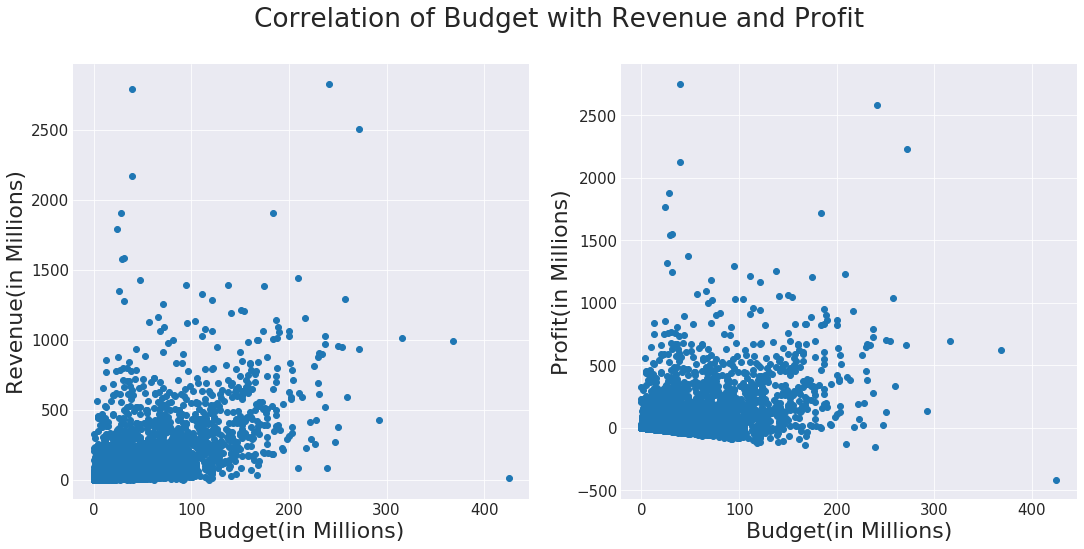

In [66]:
plt.figure(figsize=(18,8))
plt.suptitle('Correlation of Budget with Revenue and Profit')
plt.subplot(121)
plt.scatter(df_new['budget_adj'], df_new['revenue_adj'])
plt.xlabel('Budget(in Millions)')
plt.ylabel('Revenue(in Millions)')

plt.subplot(122)
plt.scatter(df_new['budget_adj'], df_new['profit'])
plt.xlabel('Budget(in Millions)')
plt.ylabel('Profit(in Millions)');

As expected Budget has a stronger correlation with revenue than with profit. For a few large values of budget the revenue is small and in case of profit, we even have a few negative values(losses). The result from correlation matrix and graphs is similar. The correlation is positive but not very strong.

# Question 11: Correlation between Rating/Vote count and Revenue/Profit

In [67]:
df_new = df1[(df1['budget_adj']>0) & (df1['revenue_adj']>0)]

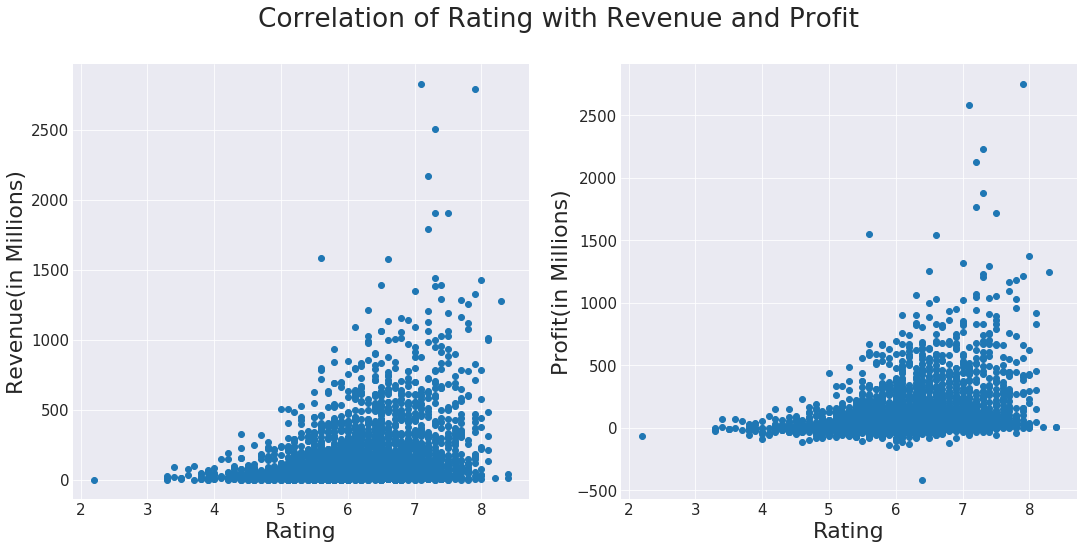

In [68]:
plt.figure(figsize=(18,8))
plt.suptitle('Correlation of Rating with Revenue and Profit')
plt.subplot(121)
plt.scatter(df_new['vote_average'], df_new['revenue_adj'])
plt.xlabel('Rating')
plt.ylabel('Revenue(in Millions)')

plt.subplot(122)
plt.scatter(df_new['vote_average'], df_new['profit'])
plt.xlabel('Rating')
plt.ylabel('Profit(in Millions)');

Rating has poor positive correlation with budget and profit.

In [69]:
df_new = df1[(df1['budget_adj']>0) & (df1['revenue_adj']>0)]

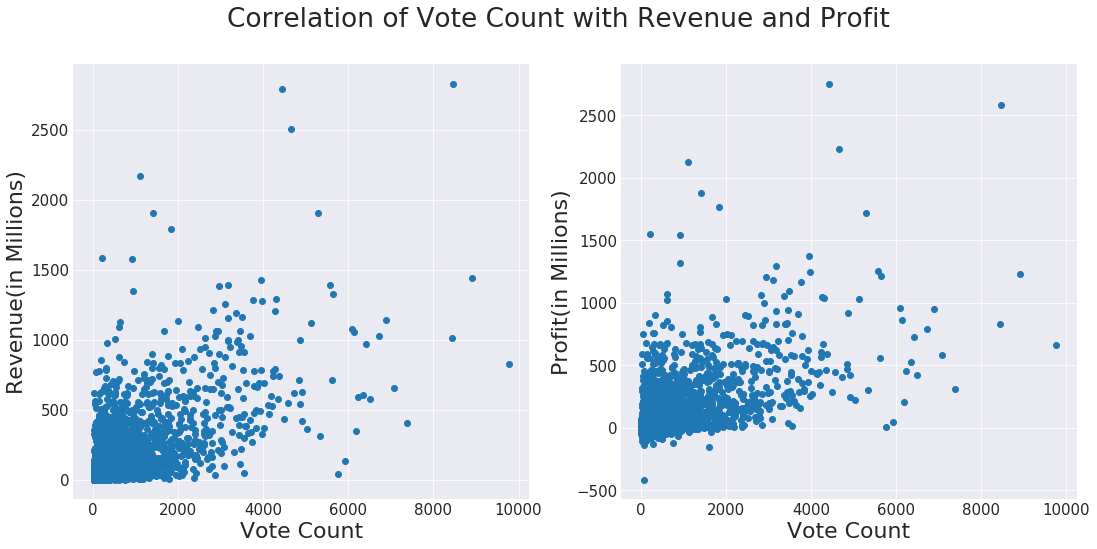

In [70]:
plt.figure(figsize=(18,8))
plt.suptitle('Correlation of Vote Count with Revenue and Profit')
plt.subplot(121)
plt.scatter(df_new['vote_count'], df_new['revenue_adj'])
plt.xlabel('Vote Count')
plt.ylabel('Revenue(in Millions)')

plt.subplot(122)
plt.scatter(df_new['vote_count'], df_new['profit'])
plt.xlabel('Vote Count')
plt.ylabel('Profit(in Millions)');

Vote count has a positive strong correlation with Revenue and Profit

# Question 12: Correlation between Popularity and Revenue/Profit

In [71]:
df_new = df1[(df1['budget_adj']>0) & (df1['revenue_adj']>0)]

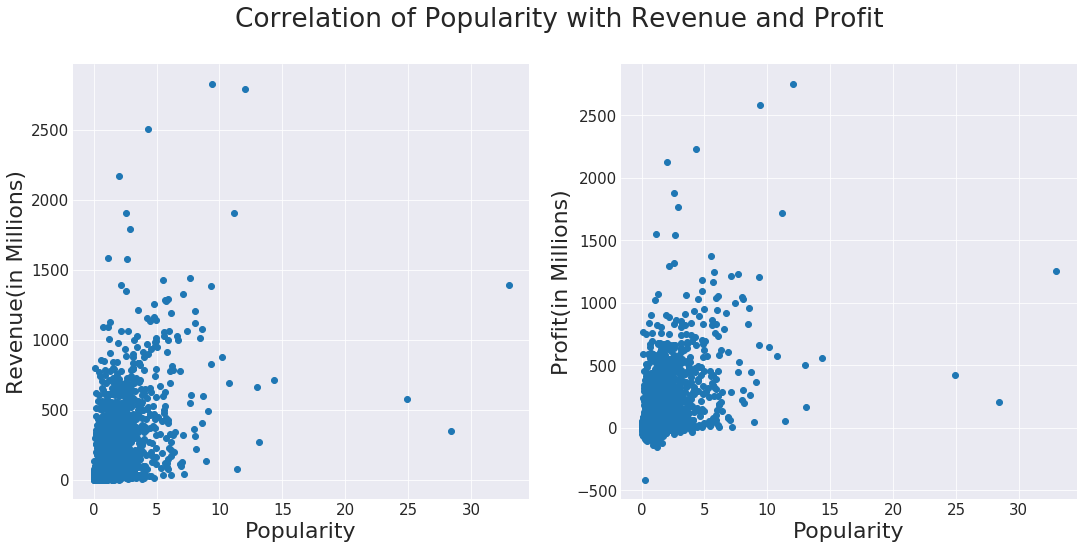

In [72]:
plt.figure(figsize=(18,8))
plt.suptitle('Correlation of Popularity with Revenue and Profit')
plt.subplot(121)
plt.scatter(df_new['popularity'], df_new['revenue_adj'])
plt.xlabel('Popularity')
plt.ylabel('Revenue(in Millions)')

plt.subplot(122)
plt.scatter(df_new['popularity'], df_new['profit'])
plt.xlabel('Popularity')
plt.ylabel('Profit(in Millions)');

Popularity has a positive correlation with Revenue and Profit. But for a few large values of popularity, revenue and profit are relatively small.

# Analysing Columns with multiple values

In [73]:
df_new = df1[(df1['budget_adj']>0) & (df1['revenue_adj']>0)]
df_new = df_new.sort_values(by=['vote_average'], ascending=False)
threshold = df1['vote_average'].mean()*(120/100)
df_new = df_new[df_new['vote_average'] >= threshold]

Here, I have used a variable 'threshold' which is used exactly how its named. The threshold used here is equal to 120% of the average movie rating of the entire dataset. You can further change this value by providing the suitable percentage in the assignment line of this variable. Hence, providing us with different sample set. The movies with rating above this threshold value are used for our analysis.

In [74]:
threshold,df1['vote_average'].mean()

(7.1700138057984359, 5.9750115048320298)

The average rating for the entire dataset is approximately 6 which is a low rating. Whereas the threshold value is slightly above 7. Which is a good par level. Any movie with rating above this seems to be good.

In [75]:
df_new.shape

(414, 16)

So, a total of 414 rows. That's a very preicse sample set we have considering the entire dataset. Rating is a good measure of any movie. It is a primary factor anyone would like to consider before watching movie. And a better estimate than mere profit or revenue.

In [76]:
df_new.isna().sum()

id                      0
popularity              0
original_title          0
cast                    1
director                0
runtime                 0
genres                  0
production_companies    5
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
release_month           0
dtype: int64

A total of 5 or 6 rows with NA values. These can be dropped from current analysis.

In [77]:
df_new.dropna(inplace = True)

In [78]:
df_new.isna().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
release_month           0
dtype: int64

In [79]:
df_new.shape

(409, 16)

Total 5 rows dropped.

In [80]:
df_new.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,45513.633252,2.525314,123.413203,1497.352078,7.465037,1997.858191,48.357254,282.218946,233.861692,7.797066
std,82177.875245,2.507244,25.629868,1595.621923,0.251125,14.786700,53.213112,393.031605,362.370789,3.361458
min,11.000000,0.017708,26.000000,10.000000,7.200000,1960.000000,0.000003,0.000043,-61.316945,1.000000
25%,640.000000,0.885824,105.000000,317.000000,7.300000,1989.000000,12.980030,43.868925,23.666889,5.000000
50%,5925.000000,1.765514,121.000000,934.000000,7.400000,2001.000000,28.847353,116.994524,86.401459,9.000000
75%,38985.000000,3.327799,137.000000,2144.000000,7.600000,2010.000000,61.911974,355.546597,286.695233,11.000000
max,333352.000000,24.949134,216.000000,9767.000000,8.400000,2015.000000,271.692064,2789.712242,2750.136651,12.000000


In [81]:
df1.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
count,10865.000000,10865.000000,10834.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,102.363855,217.399632,5.975012,2001.321859,17.549894,51.369002,33.819108,6.827612
std,92134.091971,1.000231,30.948225,575.644627,0.935138,12.813260,34.307527,144.638333,125.219384,3.441764
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,0.000000,0.000000,-413.912431,1.000000
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000,0.000000,0.000000,4.000000
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000,0.000000,0.000000,7.000000
75%,75612.000000,0.713857,112.000000,146.000000,6.600000,2011.000000,20.853251,33.701729,12.930908,10.000000
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,425.000000,2827.123750,2750.136651,12.000000


In [82]:
df1[df1['vote_average'] < threshold].describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
count,9850.000000,9850.000000,9821.000000,9850.000000,9850.000000,9850.000000,9850.000000,9850.000000,9850.000000,9850.000000
mean,64060.433909,0.589108,101.656756,173.432183,5.817442,2001.332081,17.263991,44.814344,27.550354,6.785381
std,89968.633285,0.824497,26.278653,433.300153,0.830197,12.663073,33.489906,119.425262,100.369467,3.429523
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,0.000000,0.000000,-413.912431,1.000000
25%,10661.500000,0.210294,90.000000,16.000000,5.300000,1995.000000,0.000000,0.000000,0.000000,4.000000
50%,20256.500000,0.382862,98.000000,37.000000,5.900000,2006.000000,0.000000,0.000000,0.000000,7.000000
75%,71697.250000,0.686645,110.000000,130.000000,6.400000,2011.000000,20.752732,30.829105,10.786397,10.000000
max,417859.000000,32.985763,877.000000,8458.000000,7.100000,2015.000000,425.000000,2827.123750,2586.236848,12.000000


Here is a little comparison amongst the data above threshold, entire data and the data below threshold.
Data above threshold has highest average runtime , more budget and high revenue and profit mean. Revenue and Profit are 6 to 7 times higher than other data. Whereas popularity is 4 to 5 times than the rest of the data. and Budget is almost thrice the rest of data.

In [84]:
df_new.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
4178,278,7.192039,The Shawshank Redemption,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",Frank Darabont,142.0,"[Drama, Crime]",[Castle Rock Entertainment],1994-09-10,5754,8.4,1994,36.777789,41.693463,4.915674,9


To analyse these columns, we have to seperate the elements of the list in each column.
*(First I tried to do so by merge() and melt() and then using groupby() to plot. It was a success. But later decided to do it by iterrows(). iterrows() is less complex and general).

Here, the loop iterrates over all the rows and appends the existing list with the value of that function. The length of list for revenue/profit to be appended depends on the no of elements in genre/casts/production_companies for that column. i.e. if a 
movie has 3 genre categories then a revenue/profit is added for each value of genre. 

In [85]:
genre = []
revenue_g = []
profit_g = []
casts = []
revenue_c = []
profit_c = []
prod_comp = []
revenue_pc = []
profit_pc = []

for ind,rows in df_new.iterrows():
    genre +=  rows.genres
    revenue_g += ([rows.revenue_adj]*len(rows.genres))
    profit_g += ([rows.profit]*len(rows.genres))
    
    casts += rows.cast
    revenue_c += ([rows.revenue_adj]*len(rows.cast))
    profit_c += ([rows.profit]*len(rows.cast))
    
    prod_comp += rows.production_companies
    revenue_pc += ([rows.revenue_adj]*len(rows.production_companies))
    profit_pc += ([rows.profit]*len(rows.production_companies))
    

In [86]:
len(genre), len(casts), len(prod_comp)

(1059, 2032, 1157)

In [87]:
analysis_g = pd.DataFrame({'genre':genre, 'revenue':revenue_g, 'profit':profit_g})
analysis_c = pd.DataFrame({'casts':casts, 'revenue':revenue_c, 'profit':profit_c})
analysis_pc = pd.DataFrame({'production_company':prod_comp, 'revenue':revenue_pc, 'profit':profit_pc})

analysis_g.shape, analysis_c.shape, analysis_pc.shape

((1059, 3), (2032, 3), (1157, 3))

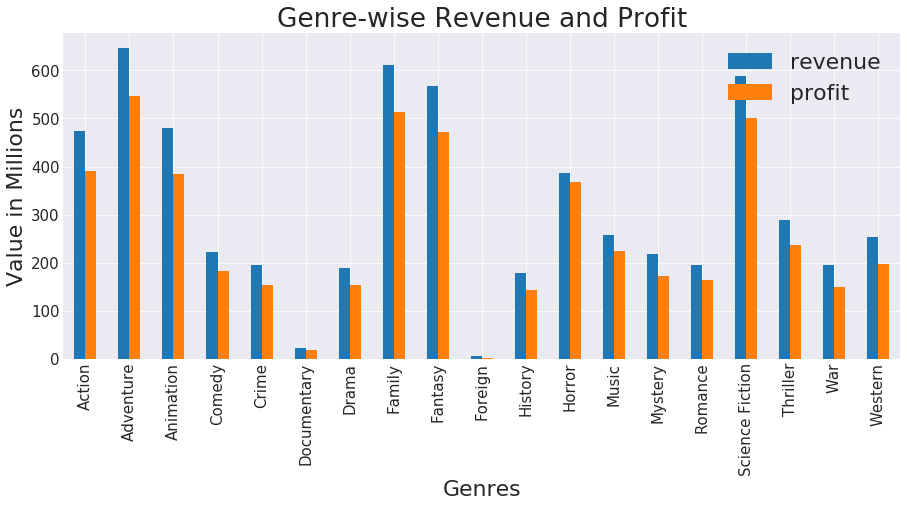

In [88]:
analysis_g.groupby(['genre']).mean().plot(kind='bar',figsize=(15,6))
plt.title('Genre-wise Revenue and Profit')
plt.xlabel('Genres')
plt.ylabel('Value in Millions');

Genre categories with highest revenue is Adventure, followed by Family, Science Fiction and Fantasy. categories with least revenues are Foreign and Documentary.
Genre categories with highest profit is Adventure, followed by Family, Science Fiction and Fantasy. categories with least revenues are Foreign and Documentary.
Revenue and profit have similar trends

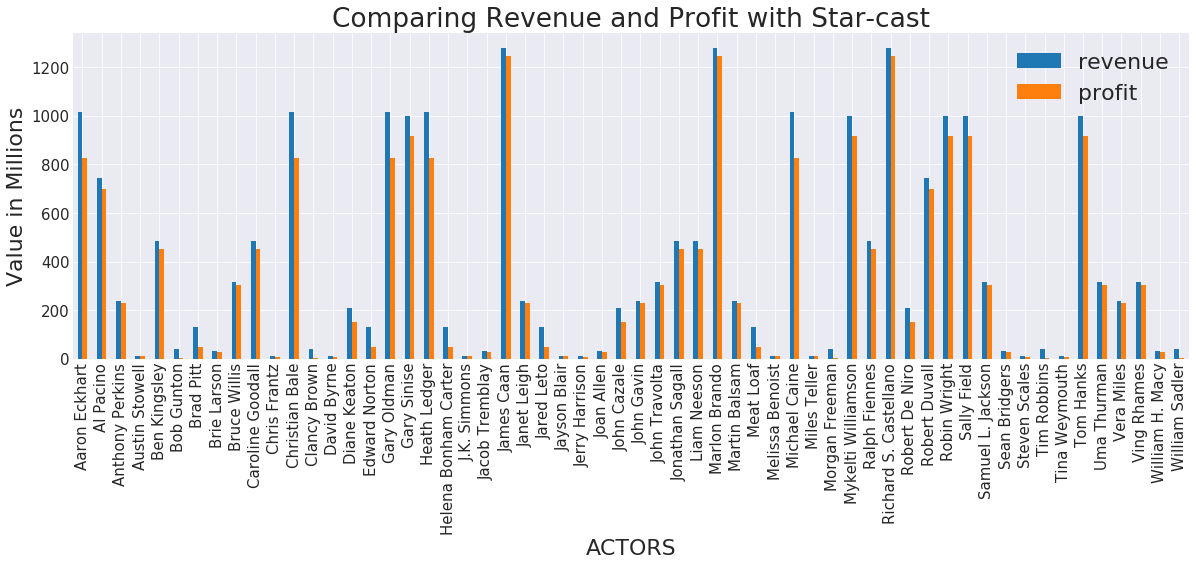

In [89]:
analysis_c[:60].groupby(['casts']).mean().plot(kind='bar',figsize=(20,6))
plt.title('Comparing Revenue and Profit with Star-cast')
plt.xticks(rotation = 'vertical')
plt.xlabel('ACTORS')
plt.ylabel('Value in Millions');

### Actors with high revenue/profit movies are:

Richard S. Castellano 

James Caan

Marlon Brando

Gary Sinise

Heath Ledger

Christian Bale

Gary Oldman

Tom Hanks

Robert Duvall 

Robin Wright


Mykelti Williamson

Michael Caine

AAron Eckhart

Al Pacino

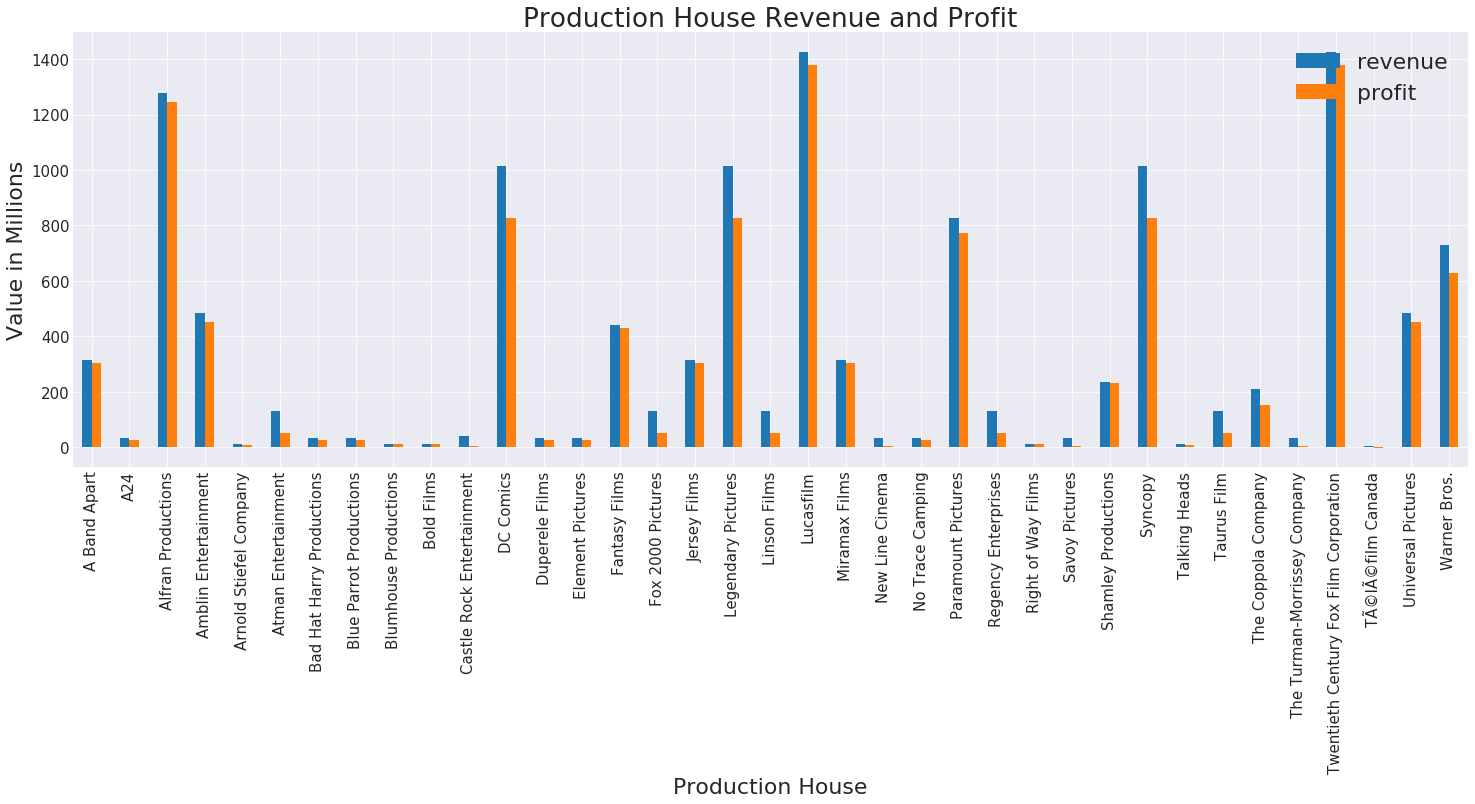

In [90]:
analysis_pc[:40].groupby(['production_company']).mean().plot(kind='bar',figsize=(25,8))
plt.title('Production House Revenue and Profit')
plt.xticks(rotation='vertical')
plt.xlabel('Production House')
plt.ylabel('Value in Millions')
plt.rc('xtick', labelsize = 18);

### TOP-10 Production House with respect to Revenue/Profit are:

Twentieth Century Fox Film Corporation

Lucasfilm

Alfran Productions

DC Comics

Legendary Pictures

Syncopy

Paramount Pictures

Warner Bros.

Universal Pictures

Amblin Entertainment

<a id='conclusions'></a>
# Conclusions

The Dataset provided has quite a sample size and various variables to work on. Starting by one idea at a time this project feels like a never-ending one. There can still be a number of combinations that can be applied on the dataset. The dataset had a sample size of more than 10,000 which is enough to have solid outcome. 

The variables with multiple values in a column such as genres took most of the time for this project. I tried a few different approaches and found iterrows() to be the best.

There are a lot of new things I didn't knew earlier. Genre 'Family' is good for business and not everyone likes to watch 'documentaries'. Animation has more revenue than Horror or Thriller. Brad Pitt does not have a very good revenue stats. Warner Bros. and Universal Pictures are not amongst the top-5 production companies. June, May and December are the best months of the year for any movie release. 

A Tom Hanks adventure/family movie from Twentieth Century Fox during June would be a blockbuster. And the same would be a Christian Bale Acton/Sci-Fi movie from DC Comics/Legendary Pictures during December.

# Limitations

1. There was data with null or zero value that had to be filtered out. Dropping all such rows at the starting itself would have meant loss of great amount of data.
2. A movie is a mix of different components. One actor or a production company by its name does not guarantee success. Its the plot, the mix of genres, characters and actors with a proper ending that makes a movie great.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])